In [1]:
import torch
import torch.nn as nn
import torchsummary
torch.manual_seed(42)

# Convolutional Layer

## 1.1 Convolutional Operation

In [2]:
input = torch.randint(5, (1,6,6), dtype=torch.float32)
input

tensor([[[2., 2., 1., 4., 1., 0.],
         [0., 4., 0., 3., 3., 4.],
         [0., 4., 1., 2., 0., 0.],
         [2., 1., 4., 1., 3., 1.],
         [4., 3., 1., 4., 2., 4.],
         [2., 0., 0., 4., 3., 4.]]])

In [3]:
conv_layer = torch.nn.Conv2d(
    in_channels= 1,
    out_channels= 1,
    kernel_size=3,  # Create a kernel: 3x3
    bias=False
)

In [4]:
conv_layer.weight

Parameter containing:
tensor([[[[ 0.0520,  0.2693,  0.0364],
          [-0.1051,  0.0896, -0.0904],
          [ 0.1403,  0.2976,  0.1927]]]], requires_grad=True)

In [5]:
init_kernel_weight = torch.randint(
    high=2, # 0, 1
    size=(conv_layer.weight.data.shape),
    dtype=torch.float32
)

init_kernel_weight

tensor([[[[1., 1., 0.],
          [1., 1., 0.],
          [1., 0., 1.]]]])

In [6]:
conv_layer.weight.data = init_kernel_weight
conv_layer.weight.data

tensor([[[[1., 1., 0.],
          [1., 1., 0.],
          [1., 0., 1.]]]])

In [7]:
output = conv_layer(input)
print('input shape: ',input.shape)
print('conv layer: ',conv_layer)
print('output shape: ',output.shape)

input shape:  torch.Size([1, 6, 6])
conv layer:  Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), bias=False)
output shape:  torch.Size([1, 4, 4])


In [8]:
x = torch.rand(3, 32, 32)
model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),     #(3, 32,32) -> (64, 30,30)
    torch.nn.ReLU(),    # activation 
    torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=9),   #(64, 30,30) -> (128, 22, 22)
    torch.nn.ReLU(),
    torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=7),  #(128, 22, 22) -> (256, 16, 16) 
    torch.nn.ReLU(),
    torch.nn.Flatten(),                                                  #(256, 16, 16) -> (256, 256)

    # connect with MLP (multilayer perceptrons) (256*16*16)
    torch.nn.Linear(65536, 64),
    torch.nn.ReLU(),
    torch.nn.Linear(64, 10)
)
# output = model(x)
torchsummary.summary(model, (3, 32, 32))
output.shape

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 30, 30]           1,792
              ReLU-2           [-1, 64, 30, 30]               0
            Conv2d-3          [-1, 128, 22, 22]         663,680
              ReLU-4          [-1, 128, 22, 22]               0
            Conv2d-5          [-1, 256, 16, 16]       1,605,888
              ReLU-6          [-1, 256, 16, 16]               0
           Flatten-7                [-1, 65536]               0
            Linear-8                   [-1, 64]       4,194,368
              ReLU-9                   [-1, 64]               0
           Linear-10                   [-1, 10]             650
Total params: 6,466,378
Trainable params: 6,466,378
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 3.33
Params size (MB): 24.67
Estima

d:\Desktop\hoc\Tu\AI\AIO_AI\CNN\.venv\Lib\site-packages\torch\cuda\__init__.py:182: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11060). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10\cuda\CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0


torch.Size([1, 4, 4])

# apply for fashioon mnist

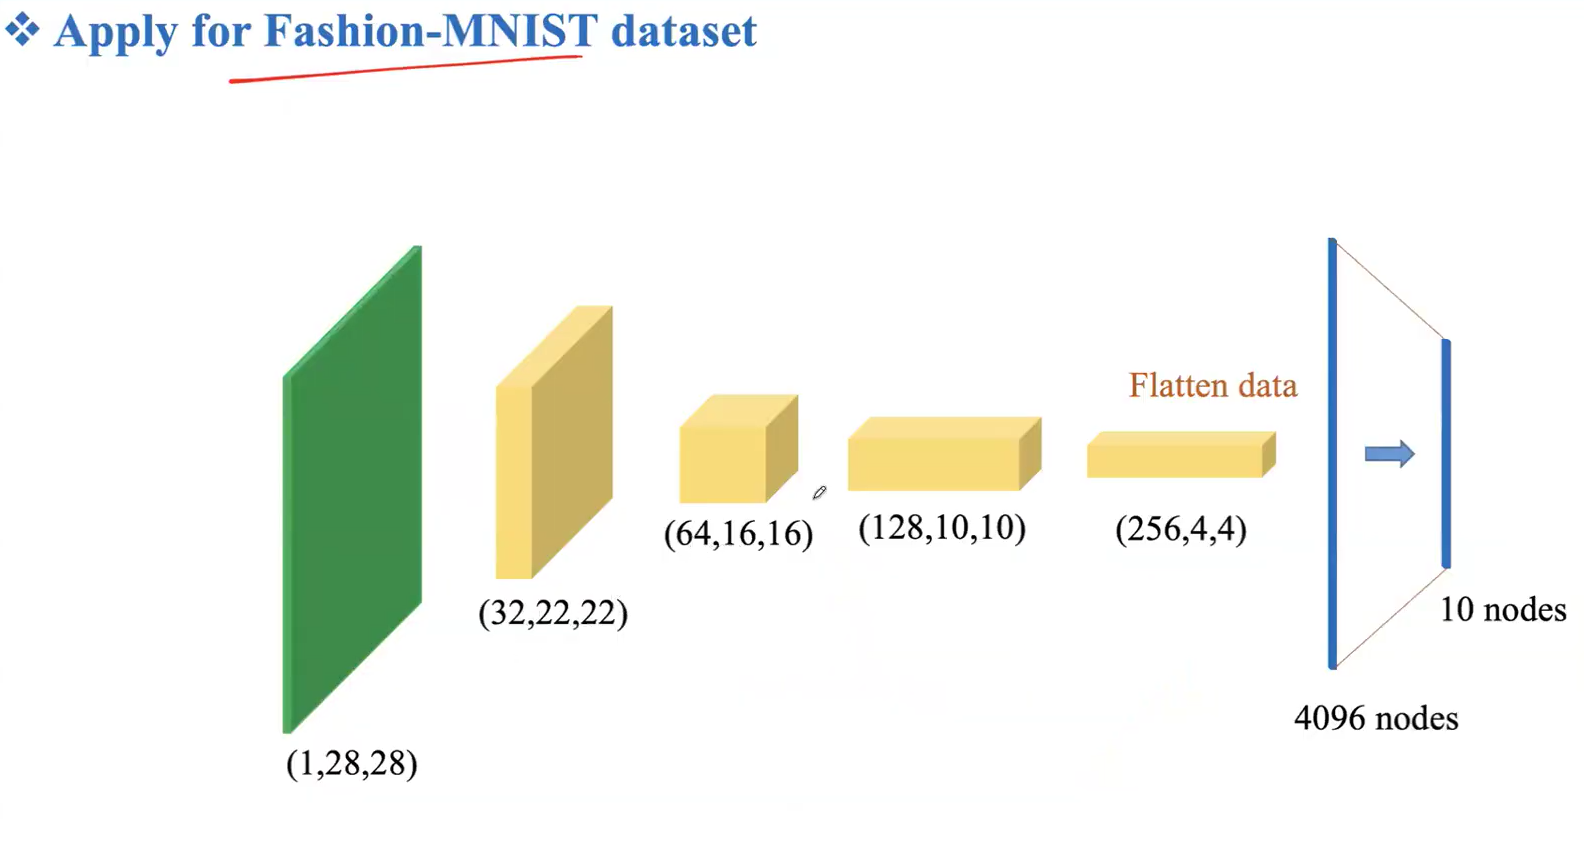

In [ ]:
import torch.nn as nn
class Custom_model(nn.Module):
    def __init__(self):
        super(Custom_model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=7)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=7)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=7)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=7)
        self.flatten = nn.Flatten()
        self.pool = nn.MaxPool2d
        self.dense1 = nn.Linear(4*4*256, 128)
        self.dense2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.relu(self.conv4(x))
        x = self.flatten(x)
        x = self.relu(self.dense1(x))
        x = self.dense2(x)
        return x

In [ ]:
device = torch.device("gpu:0" if torch.cuda.is_available() else "cpu")

In [ ]:
model = Custom_model()
model = model.to(device)

## load data

In [ ]:
import torchvision
trainform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), 
                                           torchvision.transforms.Normalize((0.5,), (0.5, ))])
trainset = torchvision.datasets.FashionMNIST(root='data_introduction',
                                             train=True,
                                             download=True,
                                             transform=trainform)
train_loader = torch.utils.data.DataLoader(trainset, 
                                           batch_size=1024,
                                           num_workers=5,
                                           shuffle=True)
testset = torchvision.datasets.FashionMNIST(root='data_introduction',
                                             train=False,
                                             download=True,
                                             transform=trainform)
train_loader = torch.utils.data.DataLoader(testset, 
                                           batch_size=1024,
                                           num_workers=5,
                                           shuffle=False)


criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 1e-5)


# Max pooling and average pooling

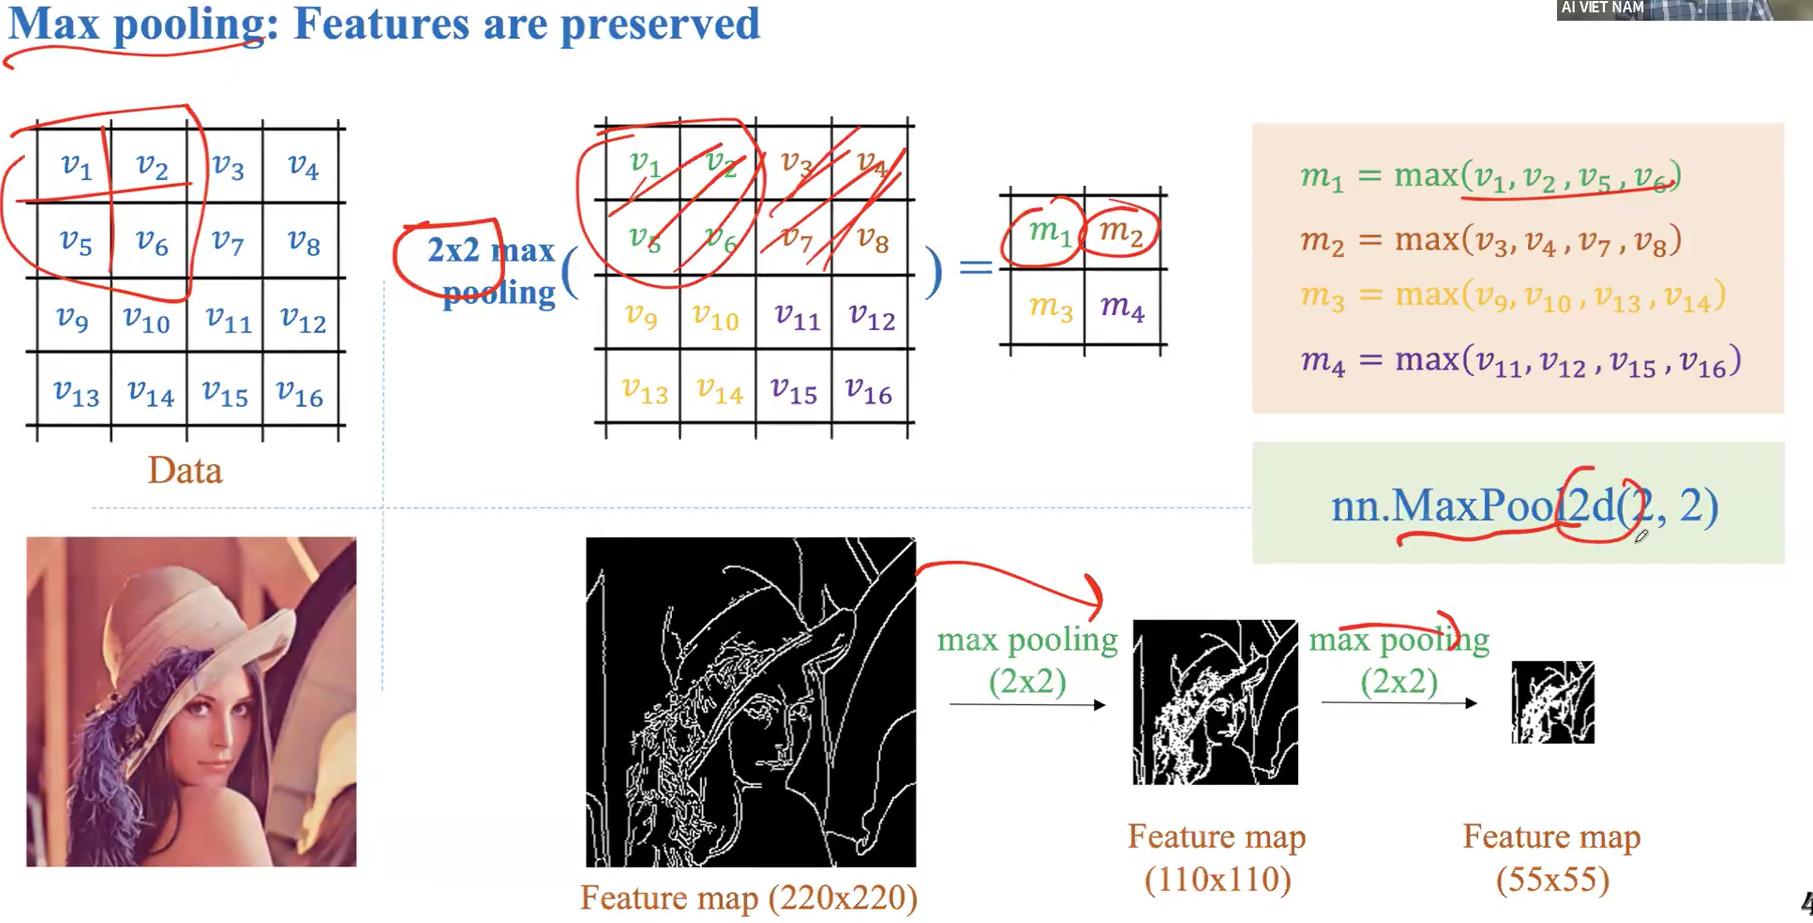

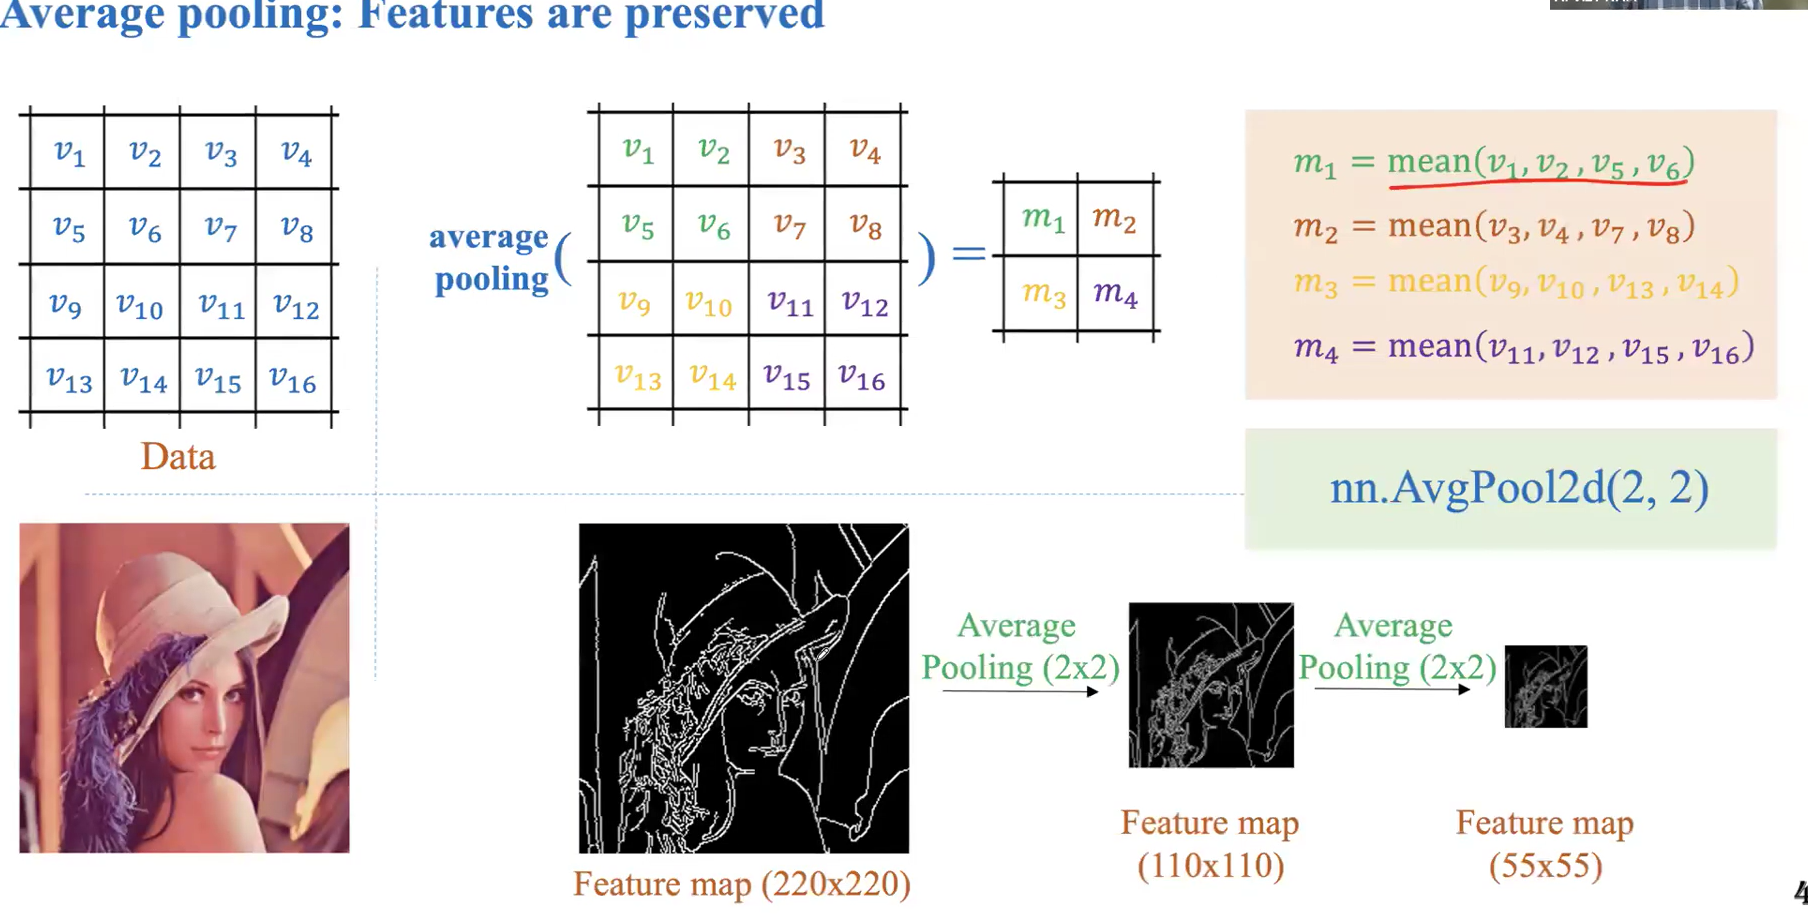

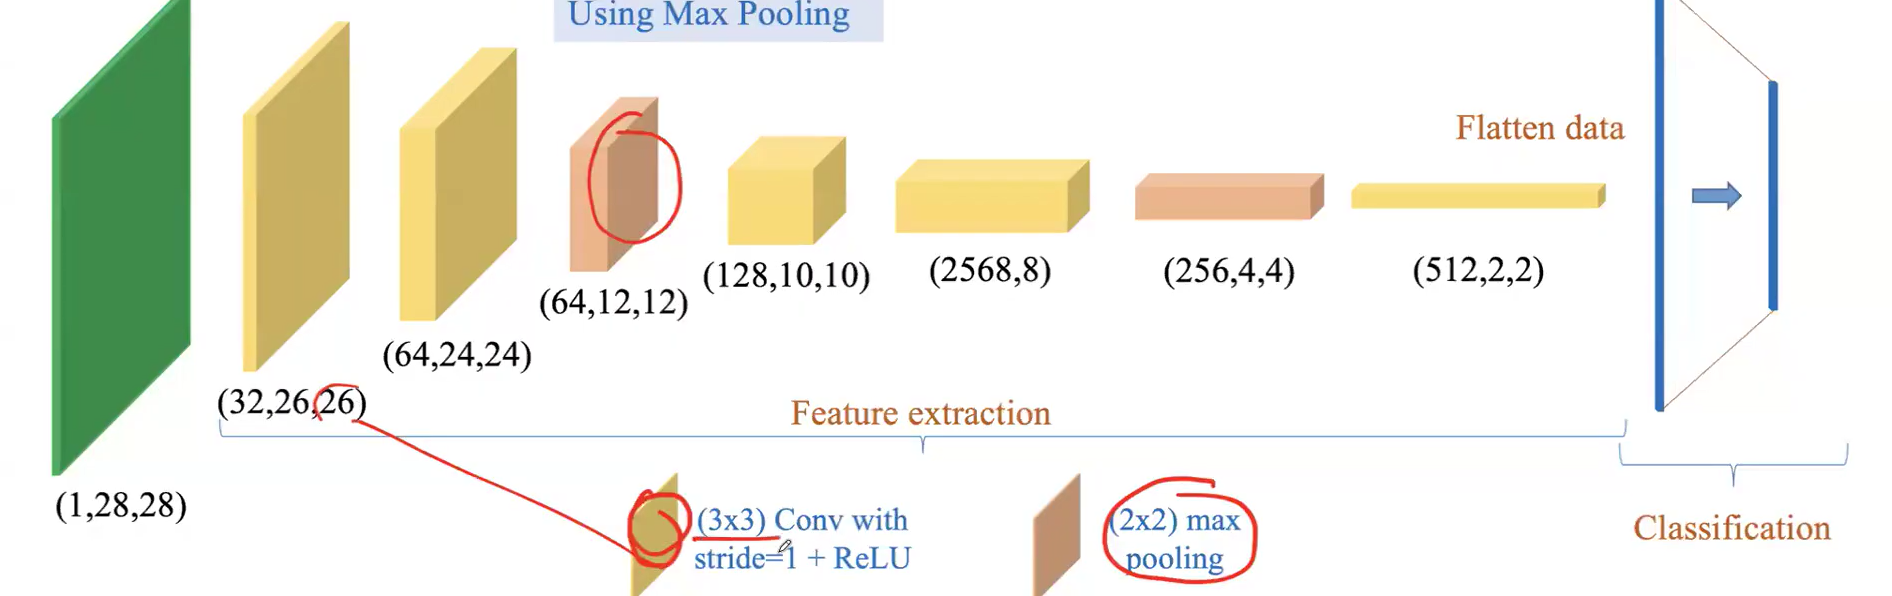